In [1]:
## load the data
setwd("/Users/sstankow/Documents/GitHub/Littorina_reproductive_mode/data/Master_data_file")
data <- read.csv("reproductive_mode_TWISST.popGenwins.csv", header=TRUE)
data_no_2.1 <- read.csv("without_LGC2.1.csv", header=TRUE)
full <- read.csv("full_dlr.csv", header=TRUE)
library("Ternary")
library("dplyr")
library("scales") 
library("DescTools")
library("moments")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
Dlr <- function(df){
    df_counts <- df %>% mutate(side = case_when(
    topo1 > topo2 ~ 'right',
    topo1 < topo2 ~ 'left'))
    
    
    counts <- as.data.frame(table(df_counts$side)) 
    left <-counts[1,2] 
    right <-counts[2,2]

    total <- right + left
    D_lr <- (left-(0.5*total))/(0.5*total)
    
    observed <- c(left,right)
    expected <- c(0.5,0.5)
    
    G <- GTest(x=observed,
      p=expected, 
      correct="none")
    
    G_pvalue <- G[3]
    
    out <-c("dlr" = D_lr, "Gtest_p" = G_pvalue, "nleft" = left, "n_right" = right)
    
    return(out)
}

In [3]:
head(data)
head(data_no_2.1)

,X,scaffold,output_order,start,end,mid,win_size,sites,lnL,topoC_count,⋯,Fst_arcana_n_sax,Fst_arcana_spain,Fst_compressa_n_sax,Fst_compressa_spain,Fst_n_sax_spain,LG,av,LG_map_position,inv_status,in_map
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>
1,34585,Contig38152,38660,2870,6411,4296,3541,100,-1238.902,8204,⋯,0.2813,0.1166,0.1263,0.1858,0.2091,1,0.9655,1_0.9655,LGC1.1,1
2,34583,Contig38152,38661,6419,7922,7059,1503,100,-1490.080,7834,⋯,0.2816,0.1431,0.1299,0.1873,0.1905,1,0.9655,1_0.9655,LGC1.1,1
3,146514,Contig85185,136046,6140,15917,9729,9777,100,-2188.093,7824,⋯,0.0614,0.0581,0.0437,0.1343,0.0022,1,0.9655,1_0.9655,LGC1.1,1
4,76857,Contig48338,76199,23492,38137,30093,14645,100,-1348.566,7496,⋯,0.0987,0.1115,0.0669,0.2127,0.0987,1,0.9655,1_0.9655,LGC1.1,1
5,114234,Contig61183,109130,599,10982,7352,10383,100,-2994.609,7134,⋯,0.0420,0.1125,0.0250,0.1142,0.0505,1,0.9655,1_0.9655,LGC1.1,1
6,134278,Contig73180,126280,85827,103316,99512,17489,100,-1379.880,7133,⋯,0.1016,0.1192,0.1119,0.2810,0.0284,1,0.9655,1_0.9655,LGC1.1,1


,topo1,topo3,topo2
,<dbl>,<dbl>,<dbl>
1,1.0000,0.0000,0.0000
2,1.0000,0.0000,0.0000
3,1.0000,0.0000,0.0000
4,1.0000,0.0000,0.0000
5,0.9813,0.0088,0.0099
6,0.8520,0.0791,0.0689


In [4]:
data_in_map <- subset(data,in_map==1)

In [5]:
table(data_in_map$inv_status)


   buffer collinear    LGC1.1    LGC1.2   LGC10.1   LGC10.2   LGC11.1 LGC14.1/2 
     5197     60441      1238       156       154      2144       977      1328 
  LGC14.3   LGC17.1    LGC2.1    LGC4.1  LGC6.1/2    LGC7.1    LGC7.2    LGC9.1 
      495       360       383       879       511       331       191      1648 

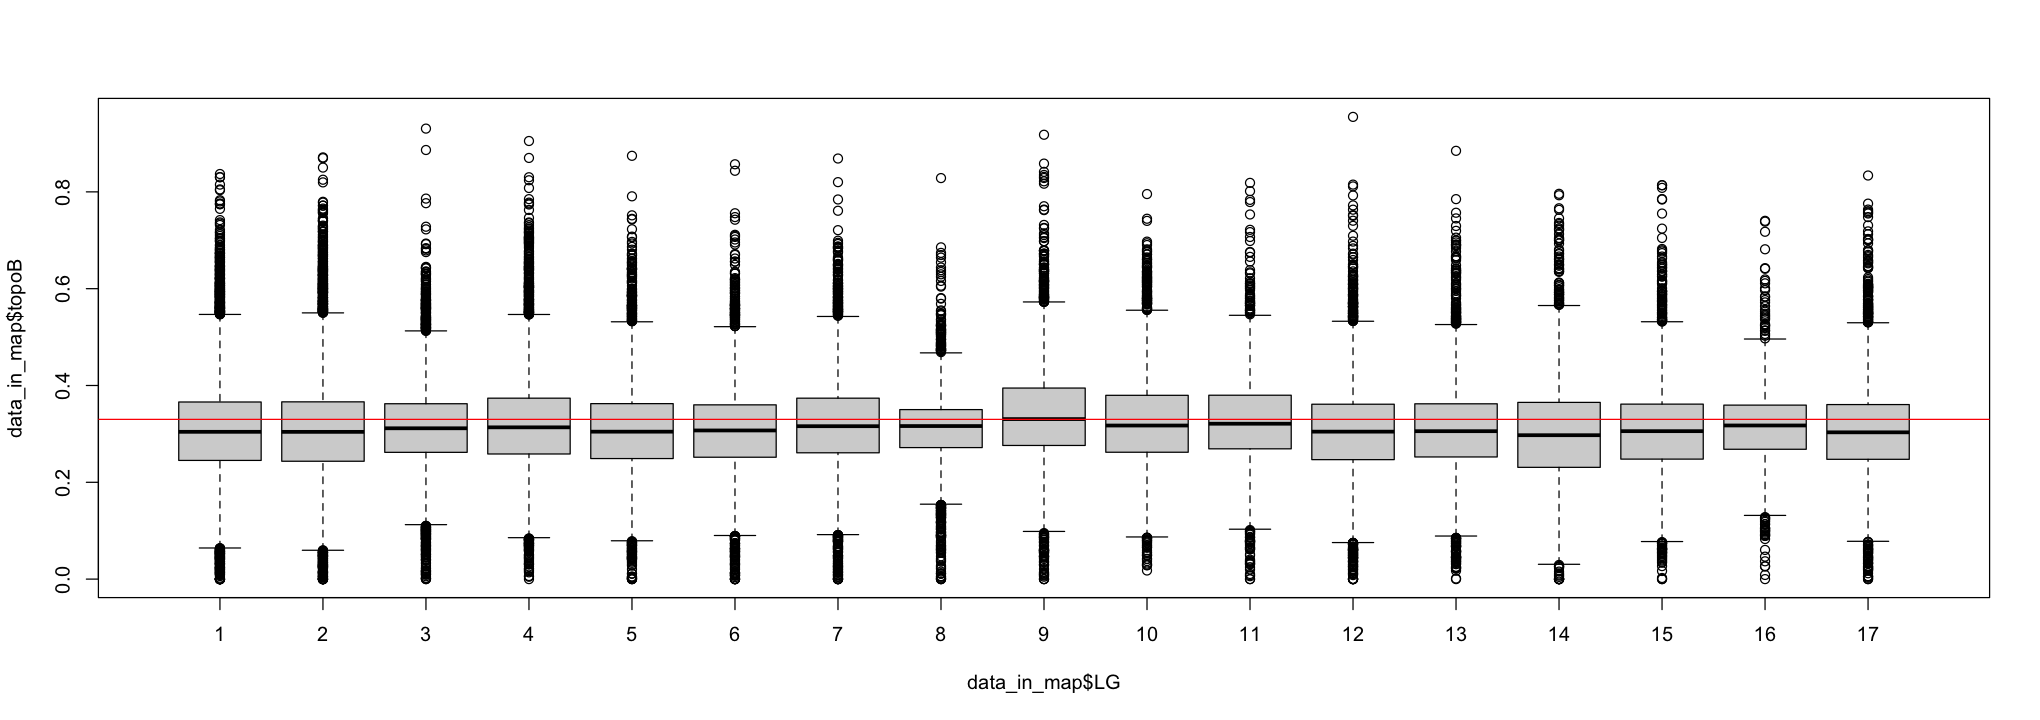

In [6]:
library(repr)
options(repr.plot.width=17, repr.plot.height=6)
boxplot(data_in_map$topoB~data_in_map$LG)
abline(h=0.33, col="red")

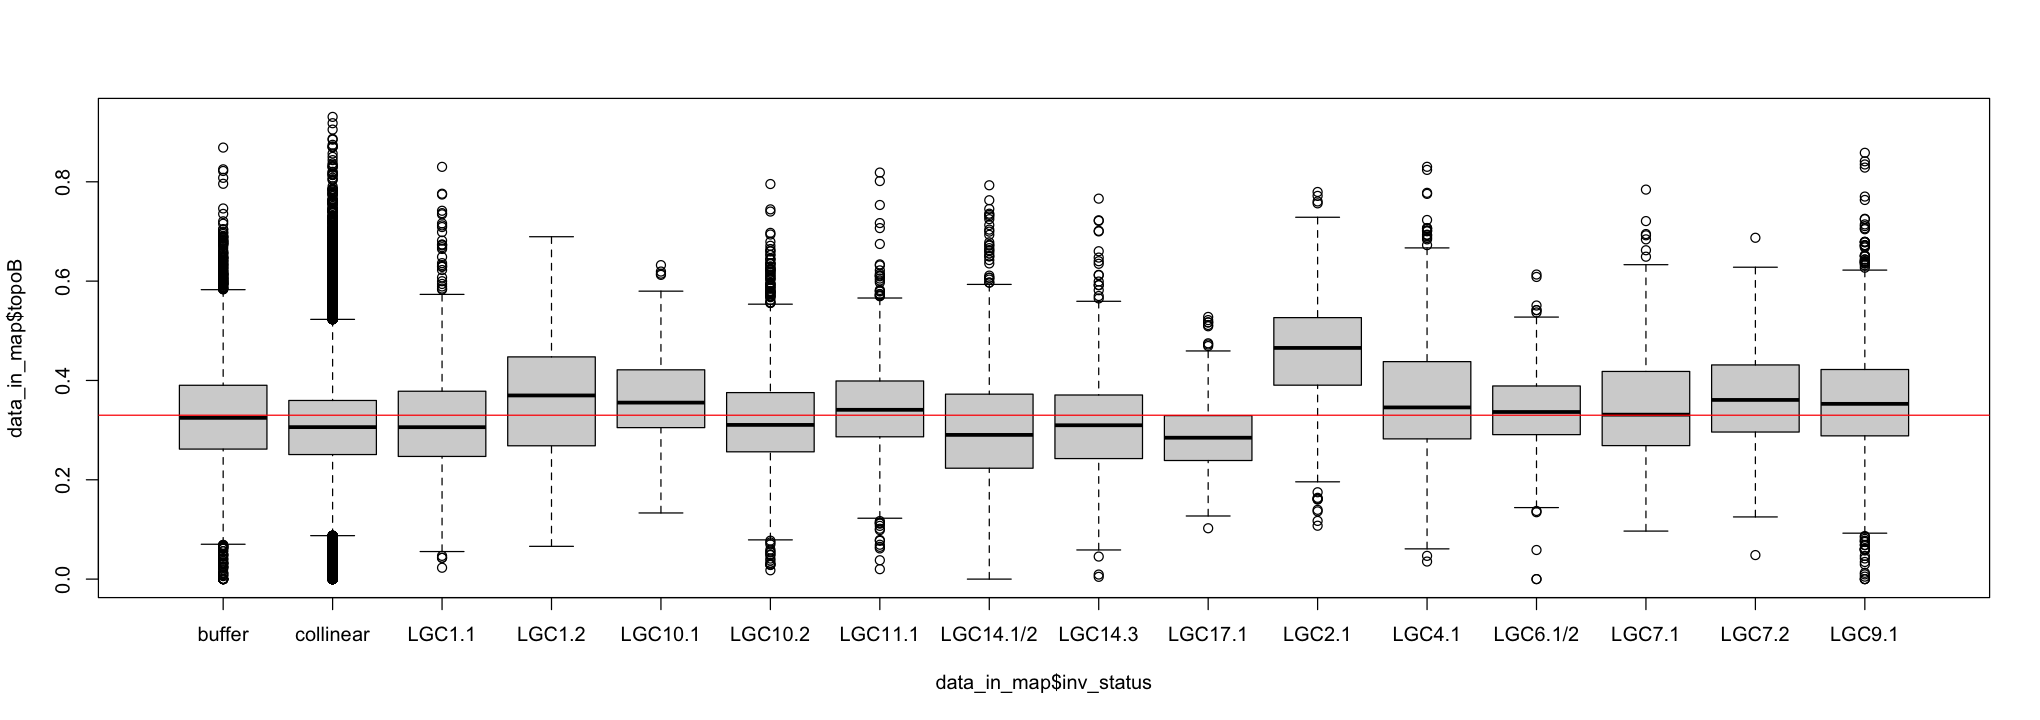

In [7]:
library(repr)
options(repr.plot.width=17, repr.plot.height=6)
boxplot(data_in_map$topoB~data_in_map$inv_status)
abline(h=0.33, col="red")


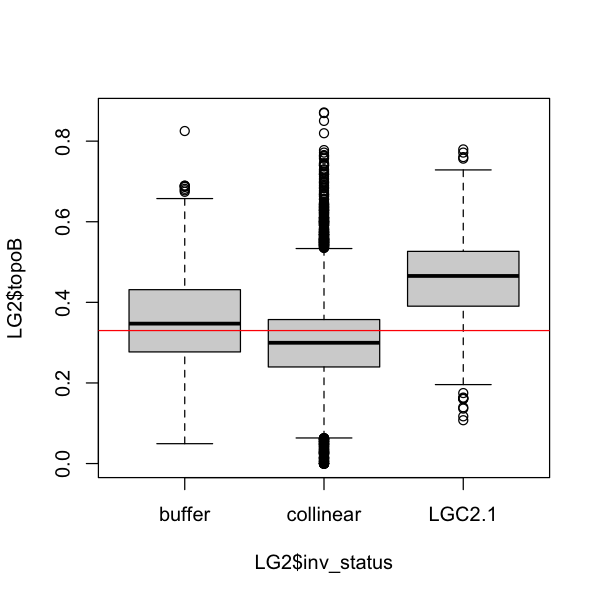

In [8]:
options(repr.plot.width=5, repr.plot.height=5)
LG2 <- subset(data_in_map,LG==2)
boxplot(LG2$topoB~LG2$inv_status)
abline(h=0.33, col="red")

In [9]:
LGC2.1 <- subset(data,inv_status=="LGC2.1")

In [10]:
LGC2.1_weights <- LGC2.1 %>%
  select(topoC, topoA, topoB)
LGC2.1_weights<-na.omit(LGC2.1_weights)
LGC2.1_weights <- LGC2.1_weights %>% relocate(topoB)


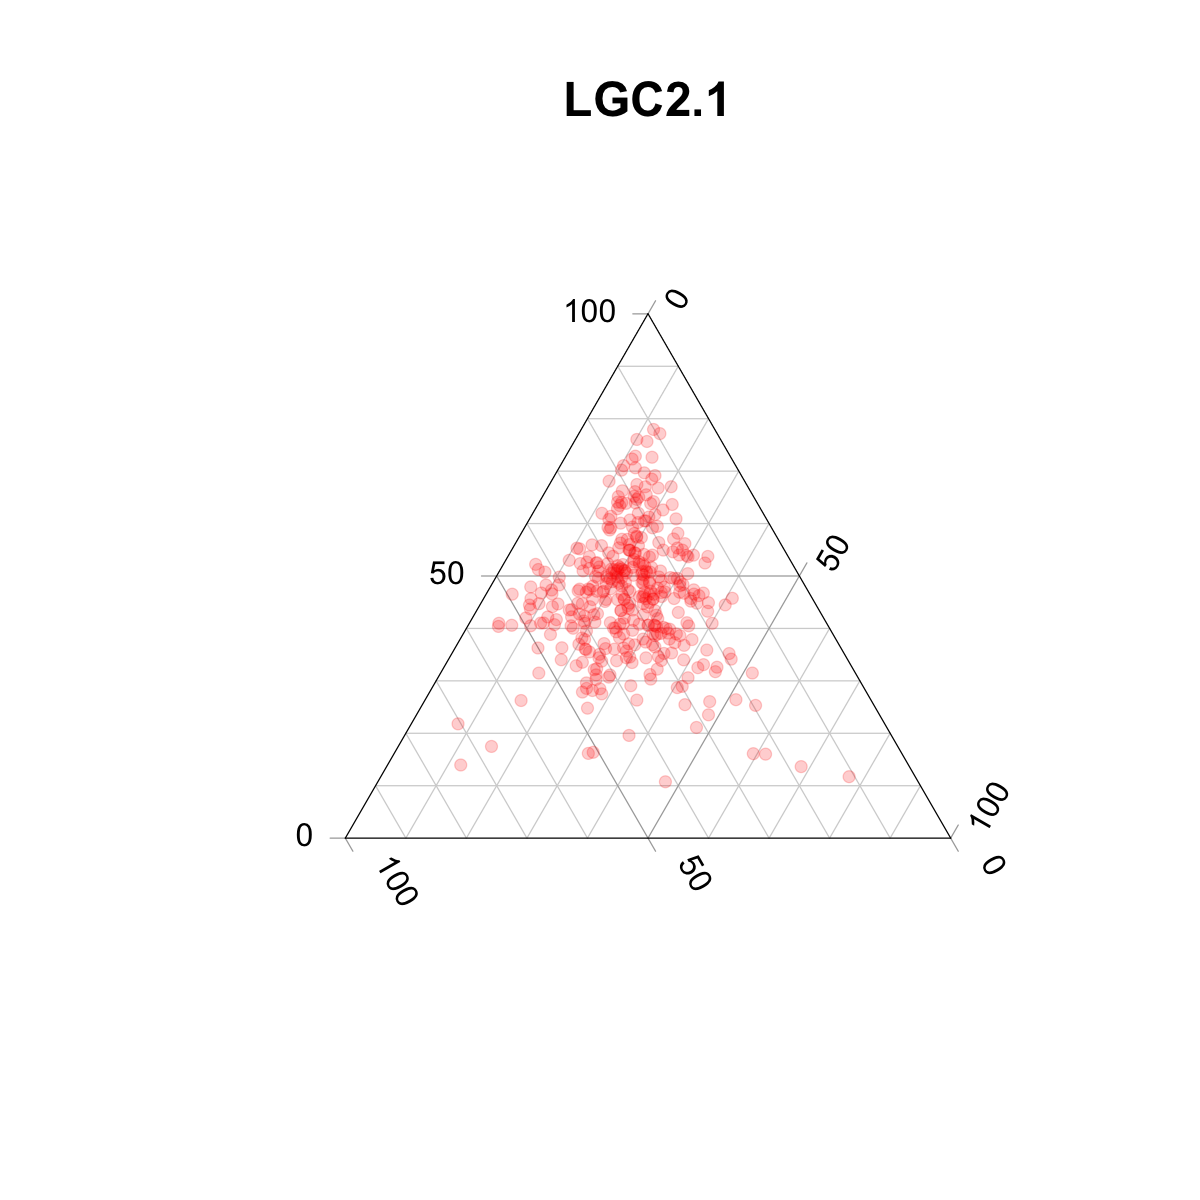

In [20]:
library(repr)
options(repr.plot.width=10, repr.plot.height=10)
trans = 0.2
TernaryPlot(main="LGC2.1", cex=2, grid.lines = 2)
AddToTernary(points, LGC2.1_weights,cex=2, pch=20, col = alpha("red", trans ))

In [12]:
Dlr(data_no_2.1)

$dlr
[1] 0.03190507

$Gtest_p.p.value
     p.value 
6.619299e-36 

$nleft
[1] 79305

$n_right
[1] 74401

In [13]:
Dlr(full)

$dlr
[1] 0.03381856

$Gtest_p.p.value
     p.value 
3.173951e-40 

$nleft
[1] 79649

$n_right
[1] 74438

In [14]:
0.0338185570489399*100

[1] 3.381856

In [15]:
colinear <- subset(data, inv_status=="collinear")
head(colinear)
data2 <- colinear %>%
  select(topoA, topoB, topoC)
colnames(data2) <- c('topo3','topo2','topo1')

,X,scaffold,output_order,start,end,mid,win_size,sites,lnL,topoC_count,⋯,Fst_arcana_n_sax,Fst_arcana_spain,Fst_compressa_n_sax,Fst_compressa_spain,Fst_n_sax_spain,LG,av,LG_map_position,inv_status,in_map
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>
8,45481,Contig40274,48595,116668,121502,119015,4834,100,-1314.580,7954,⋯,0.1585,0.0652,0.0559,0.0935,0.0183,1,15.46500,1_15.465,collinear,1
9,152750,Contig95541,140954,4845,16979,11555,12134,100,-2773.410,7827,⋯,0.0380,0.1793,0.0411,0.2045,0.0503,1,22.15250,1_22.1525,collinear,1
10,82623,Contig501,4133,9986,17516,14359,7530,100,-1187.138,7059,⋯,0.0313,0.0331,0.0930,0.2324,0.0044,1,22.15250,1_22.1525,collinear,1
11,23000,Contig2118,11478,102328,107302,104273,4974,100,-1751.667,10000,⋯,0.2030,0.2196,0.0841,0.2291,0.0336,1,22.43450,1_22.4345,collinear,1
12,141573,Contig7991,31185,1264,4506,3034,3242,100,-2127.281,7090,⋯,0.0874,0.4051,0.0267,0.3167,0.1622,1,24.41000,1_24.41,collinear,1
13,71497,Contig47003,71532,42744,48100,45983,5356,100,-1505.947,7177,⋯,0.1029,0.3986,0.0209,0.2866,0.1153,1,27.20392,1_27.20392121,collinear,1


In [16]:
head(data2)

,topo3,topo2,topo1
,<dbl>,<dbl>,<dbl>
8,0.0915,0.1131,0.7954
9,0.1038,0.1135,0.7827
10,0.1162,0.1779,0.7059
11,0.0000,0.0000,1.0000
12,0.1772,0.1138,0.7090
13,0.1775,0.1048,0.7177


In [17]:
Dlr(data2)

$dlr
[1] -0.007285672

$Gtest_p.p.value
  p.value 
0.0740378 

$nleft
[1] 29840

$n_right
[1] 30278

In [ ]:
mkdfgnskdngskns